In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from lmfit.models import LinearModel, LorentzianModel

In [3]:
def voigt1(x,s1,g1,o1,scale1):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)#+a*x**2+b
def voigt2(x,s1,s2,g1,g2,o1,o2,scale1,scale2):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)+scale2*scipy.special.voigt_profile(x-o2,s2,g2)#+a*x**2+b

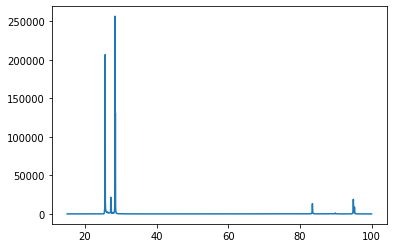

In [8]:
path =  'Data\si111_30_20_ohne.xy'
with open(path) as tf:
    data = np.loadtxt(tf,delimiter=" ").T

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])**0.5
data = np.vstack([data,err])
plt.plot(data[0],data[1])

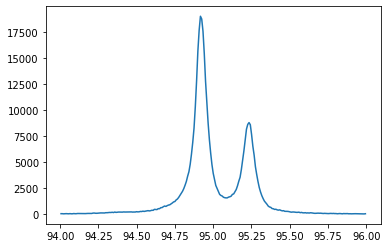

In [30]:
x=[[],[]]
for i in range(len(data[1])):
    if 94<data[0,i]<96:
        x[0].append(data[0,i])
        x[1].append(data[1,i])
plt.plot(x[0],x[1])

In [42]:
for i in range(len(data[0])):
    if data[0,i]>=96:
        print(i)

9693
9694
9695
9696
9697
9698
9699
9700
9701
9702
9703
9704
9705
9706
9707
9708
9709
9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749
9750
9751
9752
9753
9754
9755
9756
9757
9758
9759
9760
9761
9762
9763
9764
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892


b1 = [25,26.2]->[1196,1339]  
a1 = [28,29]->[1555,1675]  
b2 = [51.5,54]->[4367,4667]  
a2 = [58.5,59.4]->[5205,5313]  
b3 = [82.5,84.5]->[8077,8317]  
a3 = [94,96]->[9454,9693]  

In [ ]:
#modell erstellen  
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=25.6,min=25.5,max=25.75)
pars_voigt["scale1"].set(7000)

#Fitten
out_voigt = model_voigt.fit(data[1,667:733],x=data[0,667:733],params=pars_voigt,weights=1/data[2,667:733],nan_policy='propagate')
b1f=out_voigt.fit_report()
b1p=np.array([np.arange(25,26,0.001),out_voigt.eval(x=np.arange(25,26,0.001))])

In [45]:
#modell erstellen b1 = [25,26.2]->[1196,1339]  
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=25.5,min=25,max=26.2)
pars_voigt["scale1"].set(100)

#Fitten
out_voigt = model_voigt.fit(data[1,1196:1339],x=data[0,1196:1339],params=pars_voigt,weights=1/data[2,1196:1339],nan_policy='propagate')
b3f=out_voigt.fit_report()
b3p=np.array([np.arange(25,26.2,0.001),out_voigt.eval(x=np.arange(25,26.2,0.001))])

In [48]:
#modell erstellen a1 = [28,29]->[1555,1675]    
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=28.4,min=28,max=29)
pars_voigt["o2"].set(value=28.5,min=28,max=29)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,1555:1675],x=data[0,1555:1675],params=pars_voigt,weights=1/data[2,1555:1675],nan_policy='propagate')
a3f=out_voigt.fit_report()
a3p=np.array([np.arange(28,29,0.001),out_voigt.eval(x=np.arange(28,29,0.001))])

[[Model]]
    Model(voigt1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 91
    # data points      = 300
    # variables        = 4
    chi-square         = 967.471618
    reduced chi-square = 3.26848520
    Akaike info crit   = 359.271084
    Bayesian info crit = 374.086214
##  Warning: uncertainties could not be estimated:
    g1:      at boundary
    o1:      at initial value
[[Variables]]
    s1:      0.65866468 (init = 5e-05)
    g1:      0.99999903 (init = 0.0137)
    o1:      52.7000000 (init = 52.7)
    scale1:  44.6774322 (init = 17)


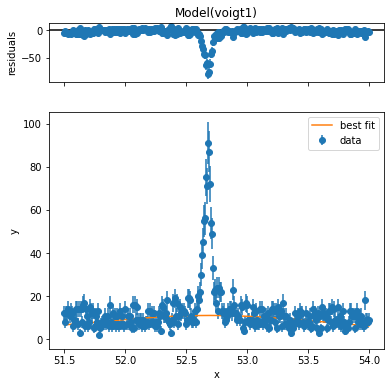

In [64]:
#modell erstellen b2 = [51.5,54]->[4367,4667]   
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=5e-5,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=52.7,min=52.5,max=52.9)
pars_voigt["scale1"].set(17)

#Fitten
out_voigt = model_voigt.fit(data[1,4367:4667],x=data[0,4367:4667],weights=1/data[2,4367:4667],params=pars_voigt,nan_policy='propagate')
out_voigt.plot()
print(out_voigt.fit_report())
b3f=out_voigt.fit_report()
b3p=np.array([np.arange(51.5,54,0.001),out_voigt.eval(x=np.arange(51.5,54,0.001))])